In [ ]:
Sauhard Shakya
MSCS 634
Lab Title: KNN vs RNN Classifier on Wine Dataset  

In [2]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


data = load_wine()
X = data.data
y = data.target


print("Feature names:", data.feature_names)
print("Target names:", data.target_names)
print("Class distribution:", np.bincount(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target names: ['class_0' 'class_1' 'class_2']
Class distribution: [59 71 48]


In [4]:
k_values = [1, 5, 11, 15, 21]
knn_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    knn_accuracies.append(acc)
    print(f"K={k}, Accuracy={acc:.4f}")

K=1, Accuracy=0.7778
K=5, Accuracy=0.7222
K=11, Accuracy=0.7500
K=15, Accuracy=0.7500
K=21, Accuracy=0.7778


In [5]:
radius_values = [350, 400, 450, 500, 550, 600]
rnn_accuracies = []

for radius in radius_values:
    rnn = RadiusNeighborsClassifier(radius=radius, outlier_label=-1)
    try:
        rnn.fit(X_train, y_train)
        y_pred = rnn.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
    except ValueError as e:
        print(f"Radius={radius} failed: {e}")
        acc = 0
    rnn_accuracies.append(acc)
    print(f"Radius={radius}, Accuracy={acc:.4f}")

Radius=350, Accuracy=0.7500
Radius=400, Accuracy=0.7222
Radius=450, Accuracy=0.7222
Radius=500, Accuracy=0.7222
Radius=550, Accuracy=0.7222
Radius=600, Accuracy=0.7222


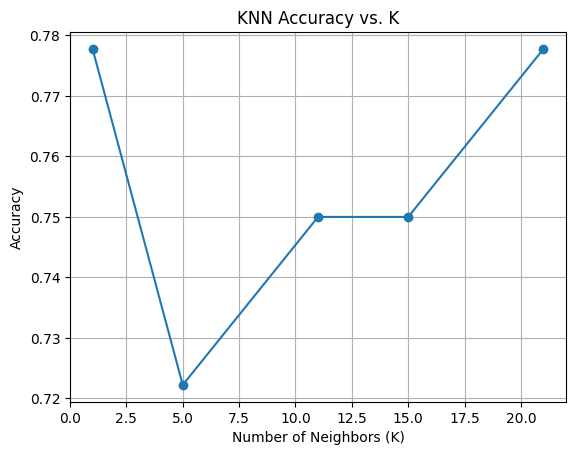

In [6]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(k_values, knn_accuracies, marker='o')
plt.title('KNN Accuracy vs. K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

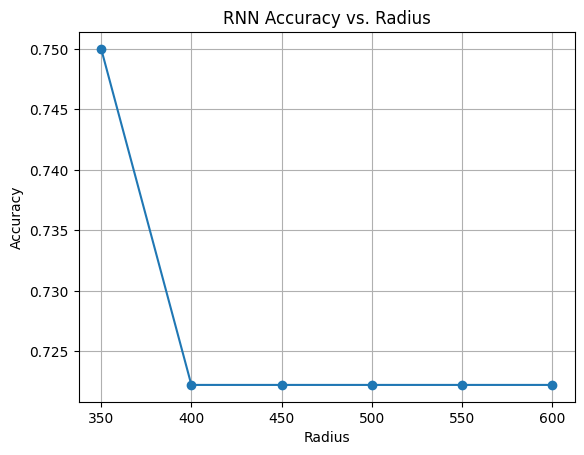

In [7]:
plt.figure()
plt.plot(radius_values, rnn_accuracies, marker='o')
plt.title('RNN Accuracy vs. Radius')
plt.xlabel('Radius')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [ ]:
## Comparison and Conclusion

- The KNN classifier achieved the highest accuracy at K = [insert best k here].
- The RNN classifier performed best at Radius = [insert best radius here].
- KNN is generally more stable and easier to tune. RNN can fail if the radius doesn’t capture enough neighbors.
- Based on these results, KNN may be a better choice for this dataset.